# Price Optimization Analysis for Airbnb

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')

# Data Understanding

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
#Size of the dataset
df.shape

(48895, 16)

In [6]:
#Extracting column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Summary of the numerical data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
# Summary of the categorical data
df.describe(include='O')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


# Data Cleaning

In [10]:
# Number of unique values in each column
df.select_dtypes(include='object').nunique()

name                   47905
host_name              11452
neighbourhood_group        5
neighbourhood            221
room_type                  3
last_review             1764
dtype: int64

In [11]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [11]:
# Check for duplicate values
df.duplicated().any()

False

In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
# Drop irrelavant columns
df=df.drop(['id','host_id','host_name','calculated_host_listings_count'],axis=1)

In [14]:
df.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'availability_365'],
      dtype='object')

In [15]:
# Data types of data
df.dtypes

name                    object
neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
availability_365         int64
dtype: object

In [16]:
# last_review column values are date. here data type is object.
#we have to change it int date type

df['last_review']=pd.to_datetime(df['last_review'],errors='coerce')
df.dtypes

name                           object
neighbourhood_group            object
neighbourhood                  object
latitude                      float64
longitude                     float64
room_type                      object
price                           int64
minimum_nights                  int64
number_of_reviews               int64
last_review            datetime64[ns]
reviews_per_month             float64
availability_365                int64
dtype: object

In [17]:
# Looking for missing values

df.isnull().sum()

name                      16
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month      10052
availability_365           0
dtype: int64

In [18]:
# Filling missing values

df.fillna({'name':'N/A'},inplace=True)
df.fillna({'last_review':0,'reviews_per_month':0},inplace=True)

In [19]:
df.isnull().sum()

name                   0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
last_review            0
reviews_per_month      0
availability_365       0
dtype: int64

In [20]:
# renaming some column with more meaningful name

df.rename(columns={'neighbourhood_group':'district','price':'price($)'},inplace=True)
df.columns

Index(['name', 'district', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price($)', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'availability_365'],
      dtype='object')

In [21]:
df.sample(3)

,name,district,neighbourhood,latitude,longitude,room_type,price($),minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
45052,"Large renovated apartment, brand new furniture.",Queens,Astoria,40.76335,-73.92769,Entire home/apt,140,3,5,2019-07-07 00:00:00,5.00,254
45045,Private room in Premium-Luxury apartment,Manhattan,Financial District,40.70472,-74.00763,Private room,210,2,5,2019-06-16 00:00:00,2.83,0
18933,"Private Cozy, Comfy & Bright Room!",Manhattan,East Harlem,40.79639,-73.93470,Private room,55,7,3,2019-05-15 00:00:00,0.09,215


Dealing with outliers

In [22]:
df.shape

(48895, 12)

In [23]:
# drop all the record with price=0

price_0=df[df['price($)']==0].index
df=df.drop(index=price_0)
df.shape

(48884, 12)

In [24]:
# drop all record with minimum_nights >365

plus_365=df[df['minimum_nights']>365].index
df=df.drop(index=plus_365)
df.shape

(48870, 12)

In [25]:
# drop all record with availability_365 < 1

no_availability=df[df['availability_365']<1].index
df=df.drop(index=no_availability)
df.shape

(31340, 12)

In [26]:
#df.to_excel('Airbnb_dataset.xlsx', sheet_name='Sheet1', index=False)

# Data Exploration and Visualization

In [27]:
df.nunique()

name                 30866
district                 5
neighbourhood          218
latitude             16036
longitude            13363
room_type                3
price($)               644
minimum_nights          91
number_of_reviews      388
last_review           1216
reviews_per_month      930
availability_365       365
dtype: int64

# Univaraiate Analysis

Price Distribution

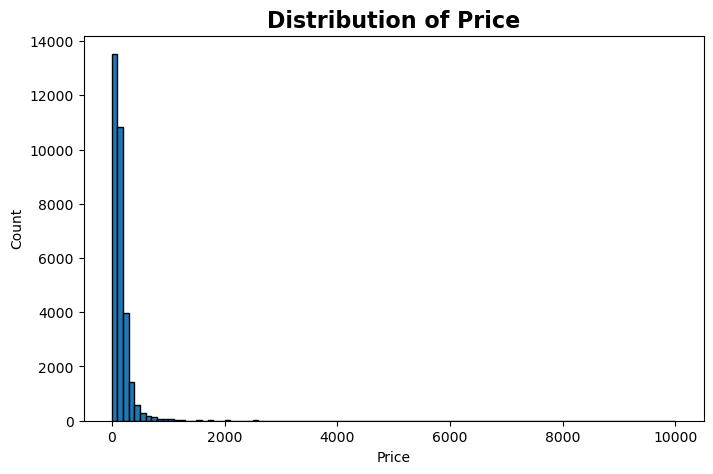

In [28]:
plt.figure(figsize=(8,5))
plt.hist(data=df,x='price($)',bins=100,range=(0,10000),edgecolor='black')
plt.title("Distribution of Price",fontweight='bold',size=16)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Distribution of Minimum Night

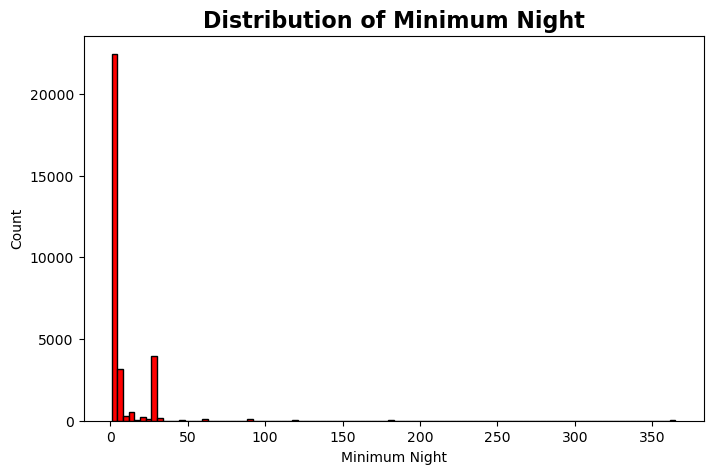

In [29]:
plt.figure(figsize=(8,5))
plt.hist(data=df,x='minimum_nights',bins=100,range=(1,365),color='r',edgecolor='black')
plt.title("Distribution of Minimum Night",fontweight='bold',size=16)
plt.xlabel('Minimum Night',size=10)
plt.ylabel('Count',size=10)
plt.show()

Distric Wise Distribution of Airbnb

In [30]:
df_district=df['district'].value_counts().sort_values(ascending=False)
print(df_district)

Manhattan        13553
Brooklyn         12247
Queens            4296
Bronx              913
Staten Island      331
Name: district, dtype: int64


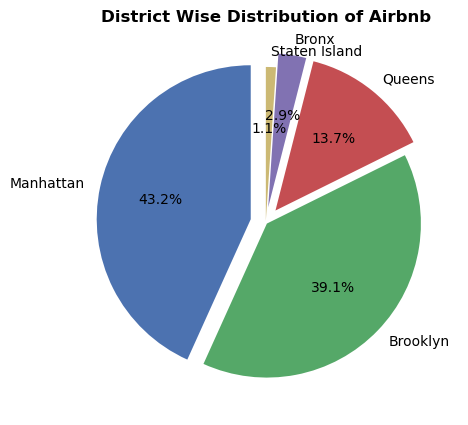

In [69]:
plt.figure(figsize=(15,5))
plt.style.use('seaborn-v0_8-deep')
plt.pie(df_district,explode=(0.1,0.01,0.1,0.1,0.01),labels=df_district.index,autopct='%1.1f%%',startangle=90)
plt.title("District Wise Distribution of Airbnb",fontweight='bold')
plt.show()

Distribution of room types

In [32]:
room_types=df['room_type'].value_counts().sort_values(ascending=False)
room_types

Entire home/apt    16523
Private room       13956
Shared room          861
Name: room_type, dtype: int64

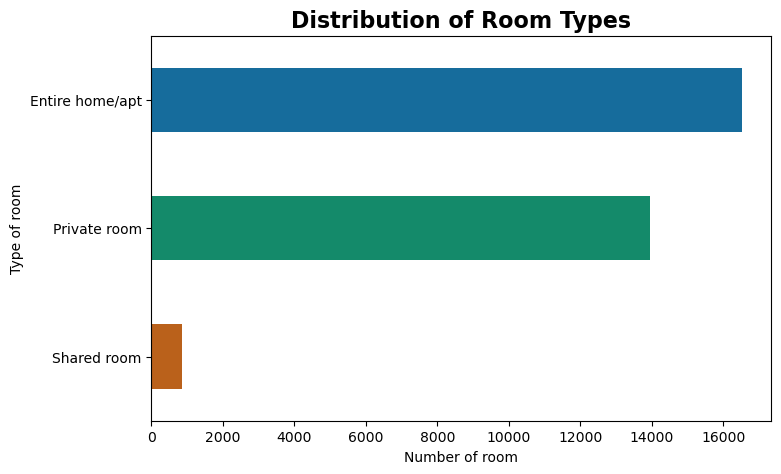

In [33]:
plt.figure(figsize=(8,5))
plt.style.use('seaborn-v0_8-colorblind')
sns.countplot(data=df,y='room_type',order=room_types.index,width=0.5)
plt.title("Distribution of Room Types",fontweight='bold',size=16)
plt.xlabel('Number of room')
plt.ylabel('Type of room')
plt.show()

Distribution of Numerical Features

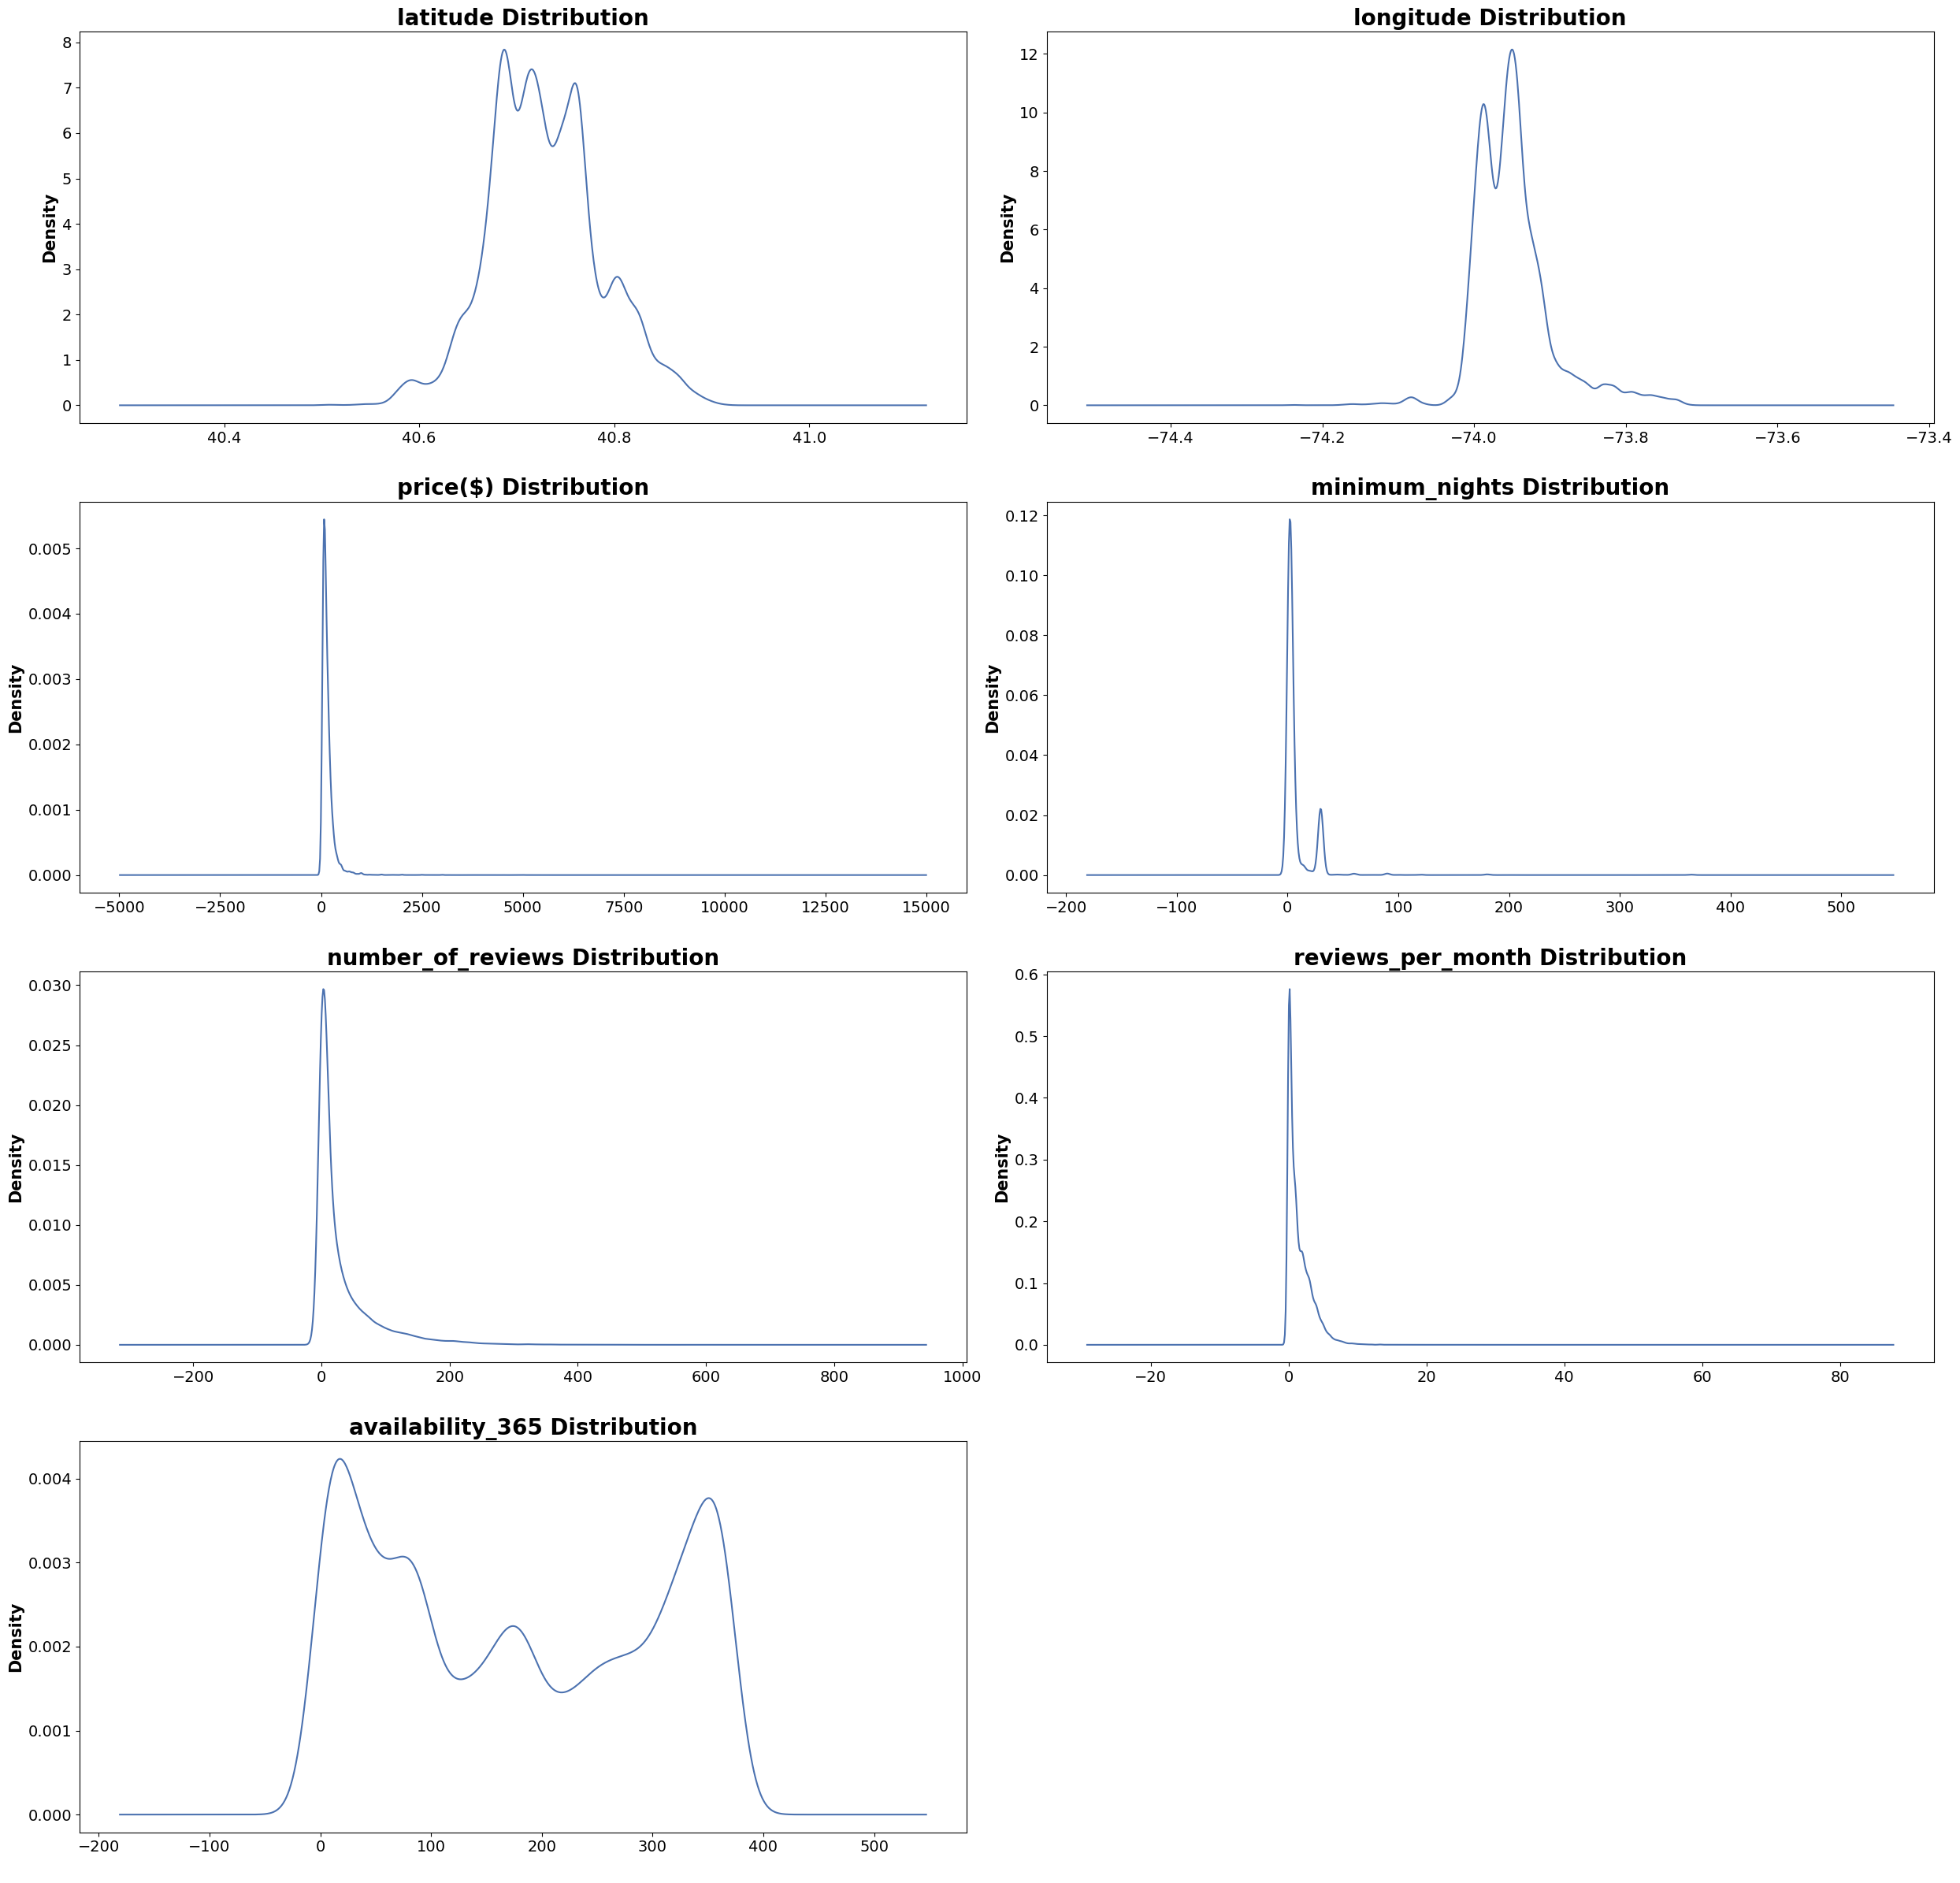

In [72]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
nominal_features = df.select_dtypes(include=['object'])

num_features_count = len(numeric_features)
num_plots = num_features_count // 2 + num_features_count % 2

fig, axes = plt.subplots(nrows=num_plots, ncols=2, figsize=(25, num_plots * 6))

for feature, ax in zip(numeric_features, axes.flatten()):
    df[feature].plot(kind='kde', ax=ax)
    ax.set_title(f'{feature} Distribution', fontsize=20, fontweight='bold')
    ax.set_xlabel(' ',fontsize=15,fontweight='bold')  # Set x-axis label
    ax.set_ylabel('Density', fontsize=15,fontweight='bold') 
    ax.tick_params(axis='both', which='major', labelsize=14)
if num_features_count % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

# Bivariate Analysis

District Wise Price Variation For Different Room Types

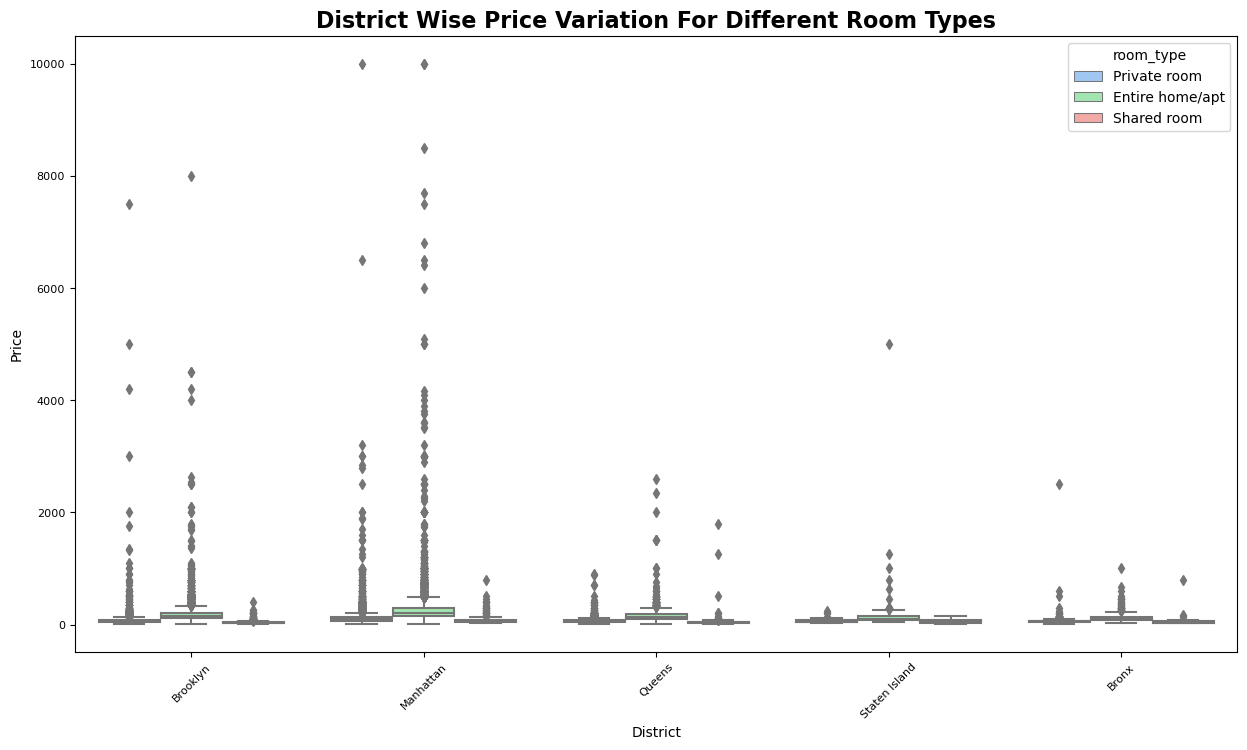

In [34]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn-v0_8-pastel')
sns.boxplot(data=df,x='district',y='price($)',hue='room_type')
plt.title("District Wise Price Variation For Different Room Types",fontweight='bold',size=16)
plt.xlabel('District',size=10)
plt.ylabel('Price',size=10)
plt.xticks(rotation=45,size=8)
plt.yticks(size=8)
plt.show()

Average price variation for room types in different districts

In [35]:
distr_priceroom=df.groupby(by=['district','room_type']) ['price($)'].mean().sort_values(ascending=False)
distr_priceroom.head()

district       room_type      
Manhattan      Entire home/apt    268.255571
Brooklyn       Entire home/apt    187.761905
Staten Island  Entire home/apt    176.776316
Queens         Entire home/apt    155.329457
Bronx          Entire home/apt    131.682390
Name: price($), dtype: float64

In [36]:
distr_priceroom=pd.DataFrame(distr_priceroom).reset_index()
distr_priceroom.head(10)

,district,room_type,price($)
0,Manhattan,Entire home/apt,268.255571
1,Brooklyn,Entire home/apt,187.761905
2,Staten Island,Entire home/apt,176.776316
3,Queens,Entire home/apt,155.329457
4,Bronx,Entire home/apt,131.682390
5,Manhattan,Private room,127.971560
6,Manhattan,Shared room,84.441791
7,Brooklyn,Private room,80.772990
8,Queens,Private room,69.043697
9,Bronx,Private room,66.822018


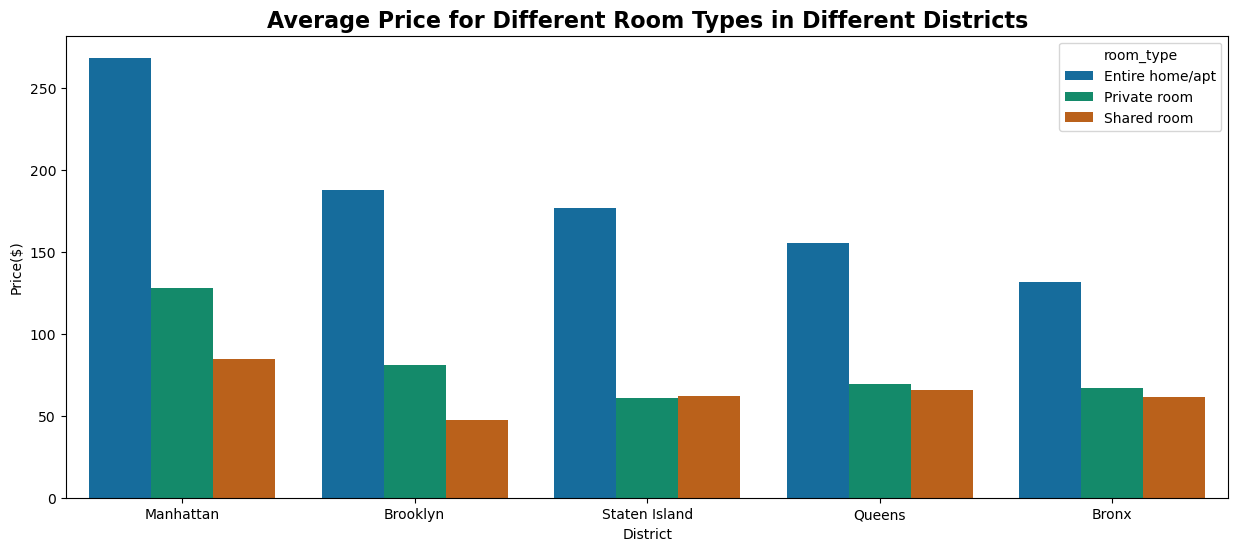

In [54]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-v0_8-colorblind')
sns.barplot(x=distr_priceroom['district'],y=distr_priceroom['price($)'],hue=distr_priceroom['room_type'])
plt.title("Average Price for Different Room Types in Different Districts",fontweight='bold',size=16)
plt.xlabel('District')
plt.ylabel('Price($)')
plt.show()

Relationship between Number of Reviews and Price

In [40]:
df['number_of_reviews'].describe()

count    31340.000000
mean        31.861232
std         51.646659
min          0.000000
25%          2.000000
50%         10.000000
75%         39.000000
max        629.000000
Name: number_of_reviews, dtype: float64

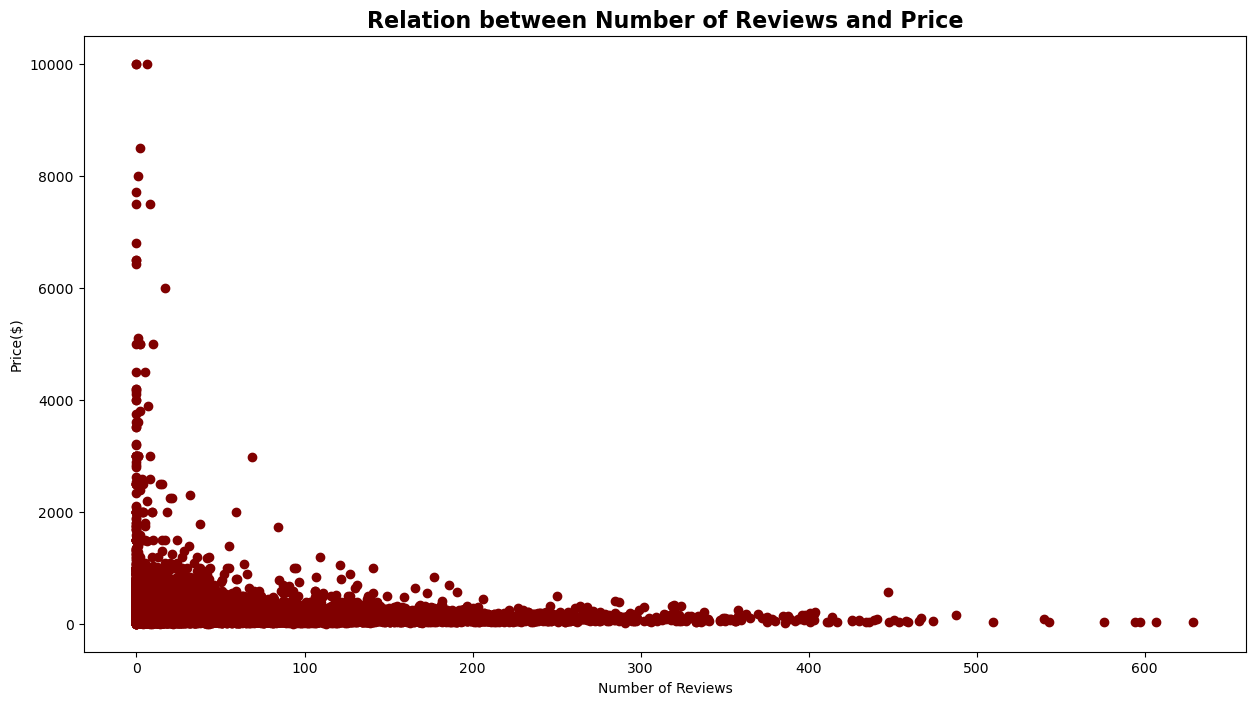

In [41]:
plt.figure(figsize=(15,8))
dark_red = (0.5, 0, 0)
plt.scatter(df['number_of_reviews'],df['price($)'],color=dark_red)
plt.title("Relation between Number of Reviews and Price",fontweight='bold',size=16)
plt.xlabel('Number of Reviews')
plt.ylabel('Price($)')
plt.show()

Relation Between Minimum Nights and Price

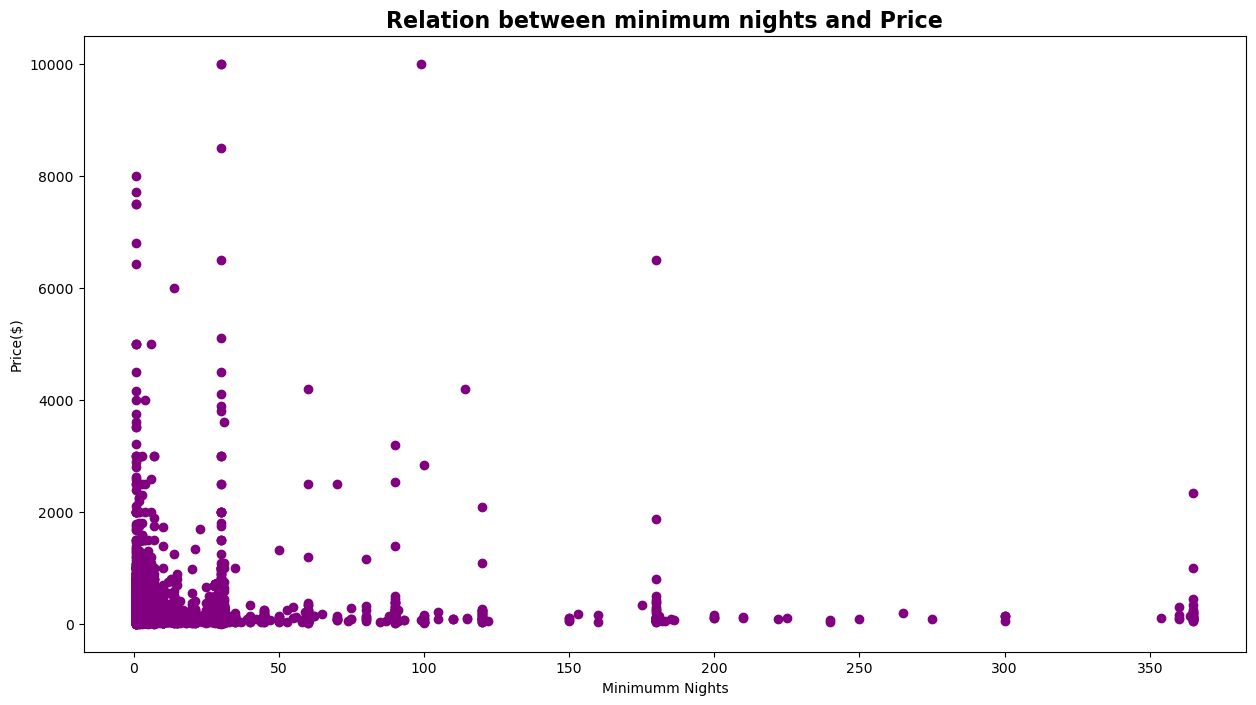

In [42]:
plt.figure(figsize=(15,8))
dark_purple = (0.5, 0, 0.5)
plt.scatter(df['minimum_nights'],df['price($)'],color=dark_purple)
plt.title("Relation between minimum nights and Price",fontweight='bold',size=16)
plt.xlabel('Minimumm Nights')
plt.ylabel('Price($)')
plt.show()

Relation Between Last Review Date and Price

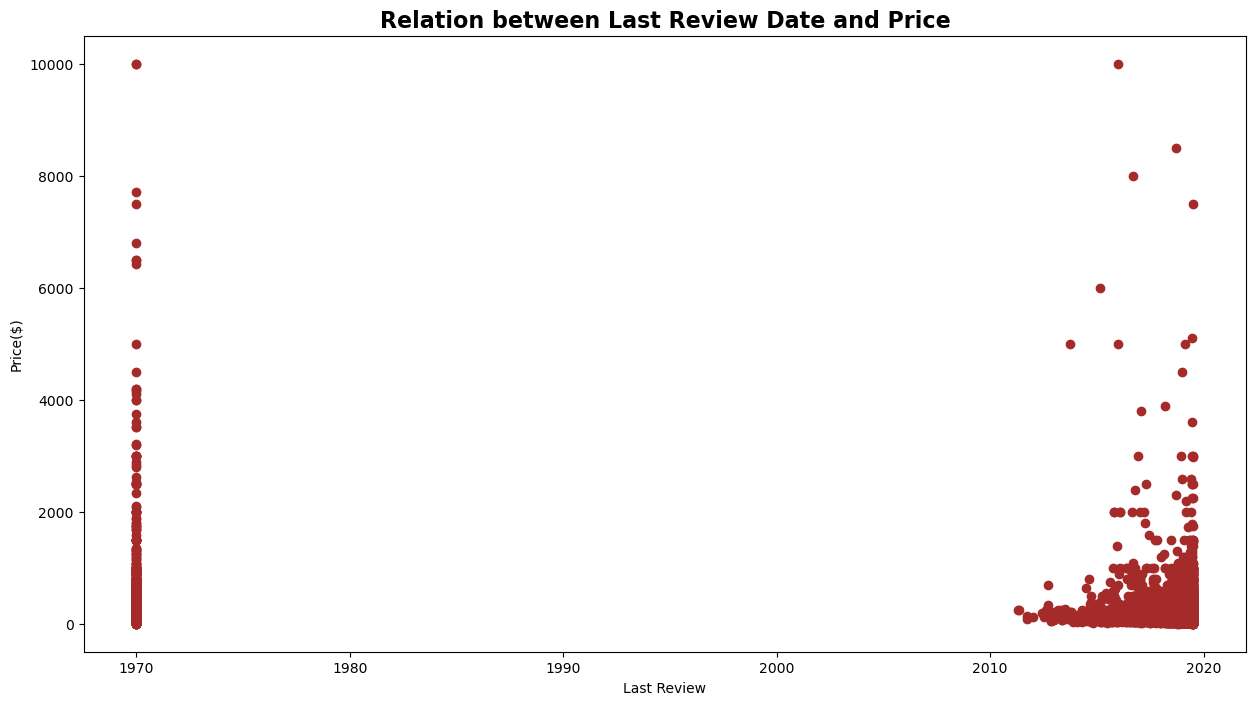

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(df['last_review'],df['price($)'],color='brown')
plt.title("Relation between Last Review Date and Price",fontweight='bold',size=16)
plt.xlabel('Last Review')
plt.ylabel('Price($)')
plt.show()

Number of Reviews and District

In [44]:
dist_review=df.groupby('district')['number_of_reviews'].sum().sort_values(ascending=False)
dist_review

district
Brooklyn         425023
Manhattan        392263
Queens           143853
Bronx             26527
Staten Island     10865
Name: number_of_reviews, dtype: int64

In [45]:
dist_review=pd.DataFrame(dist_review).reset_index()
dist_review

,district,number_of_reviews
0,Brooklyn,425023
1,Manhattan,392263
2,Queens,143853
3,Bronx,26527
4,Staten Island,10865


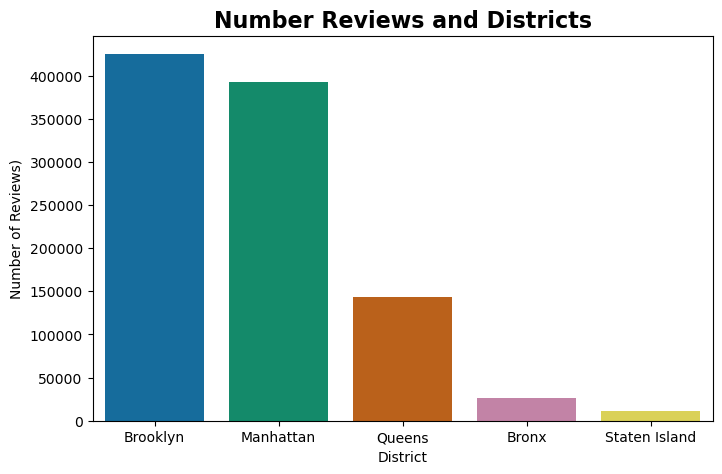

In [46]:
plt.figure(figsize=(8,5))
plt.style.use('seaborn-v0_8-colorblind')
sns.barplot(x=dist_review['district'],y=dist_review['number_of_reviews'])
plt.title("Number Reviews and Districts",fontweight='bold',size=16)
plt.xlabel('District')
plt.ylabel('Number of Reviews)')
plt.show()

Average Availability in Top 20 Neighbourhoods

In [70]:
avg_availability=df.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False).head(20)
avg_availability

neighbourhood
Fort Wadsworth     365.000000
Co-op City         364.000000
Willowbrook        351.000000
Port Richmond      343.800000
Eastchester        333.461538
Silver Lake        324.000000
Edgemere           302.800000
Richmondtown       300.000000
Mill Basin         290.000000
Bellerose          283.333333
Midland Beach      283.200000
Randall Manor      275.210526
West Brighton      274.722222
Manhattan Beach    274.166667
Mount Eden         272.333333
Spuyten Duyvil     270.000000
Hunts Point        269.062500
Tottenville        267.571429
Belmont            264.941176
Williamsbridge     264.058824
Name: availability_365, dtype: float64

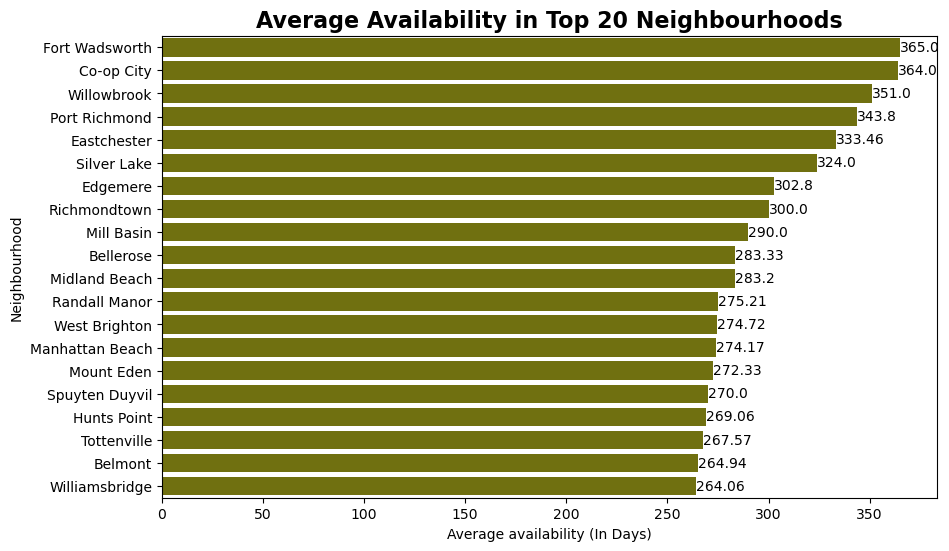

In [71]:
plt.figure(figsize=(10,6))
dark_green = (0.5, 0.5, 0)
sns.barplot(x=avg_availability.values,y=avg_availability.index,color=dark_green)
for index, value in enumerate(avg_availability.values):
          plt.text(value,index,f'{round(value,2)}', ha='left', va='center')
plt.title("Average Availability in Top 20 Neighbourhoods",size=16,fontweight='bold')
plt.xlabel('Average availability (In Days)')
plt.ylabel('Neighbourhood')
plt.show()

Top 30 Highest Number of Reviews and Nieghbourhood

In [47]:
neigh_review=df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(30)
neigh_review.head()

neighbourhood
Bedford-Stuyvesant    98126
Williamsburg          72178
Harlem                67163
Bushwick              46214
Hell's Kitchen        45589
Name: number_of_reviews, dtype: int64

In [48]:
neigh_review=pd.DataFrame(neigh_review).reset_index()
neigh_review.head()

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,98126
1,Williamsburg,72178
2,Harlem,67163
3,Bushwick,46214
4,Hell's Kitchen,45589


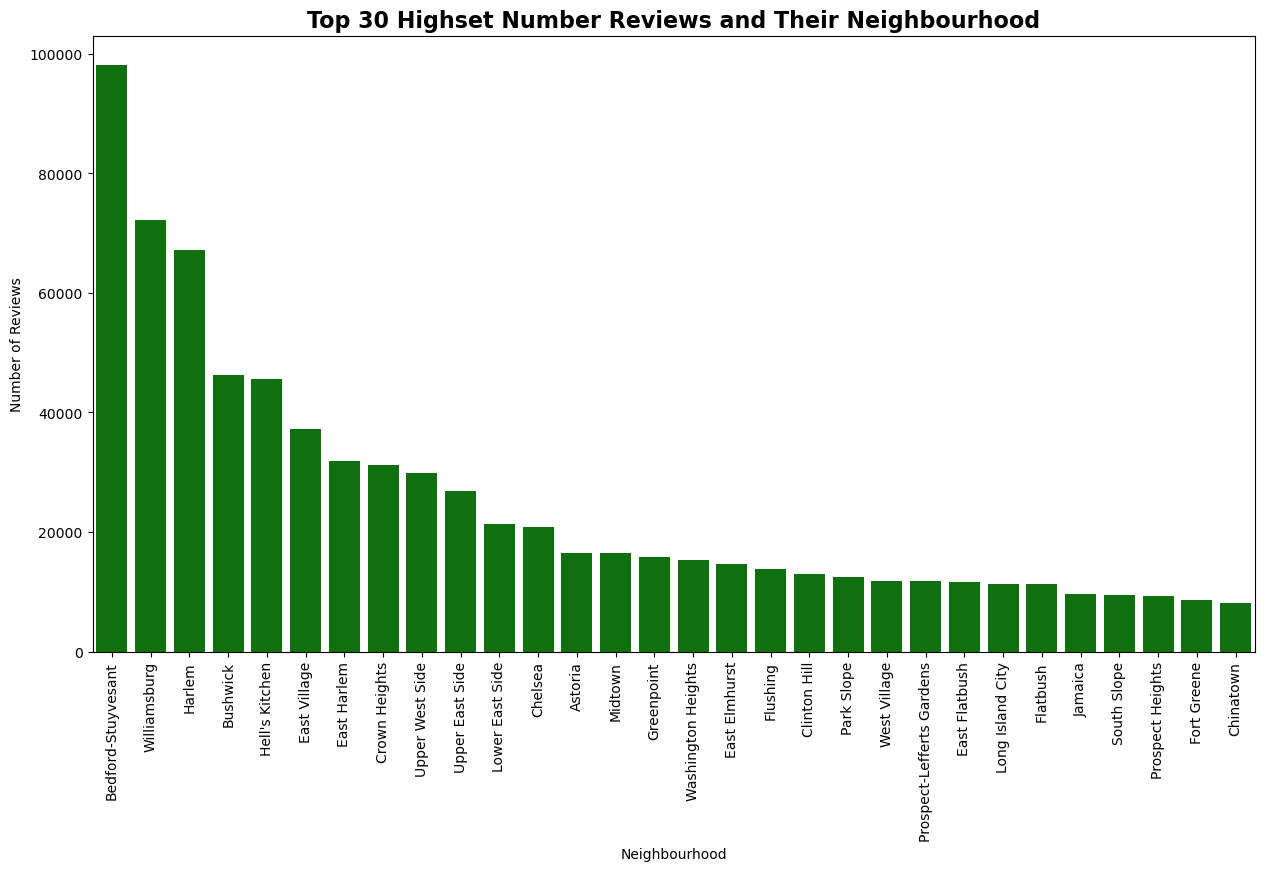

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(x=neigh_review['neighbourhood'],y=neigh_review['number_of_reviews'],color='g')
plt.title("Top 30 Highset Number Reviews and Their Neighbourhood",fontweight='bold',size=16)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

Bottom 30 lowest Number of Reviews and Nieghbourhood

In [50]:
neigh_review=df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).tail(30)
neigh_review.head()

neighbourhood
Riverdale          86
Melrose            84
Richmondtown       79
Lighthouse Hill    78
New Dorp Beach     74
Name: number_of_reviews, dtype: int64

In [51]:
neigh_review=pd.DataFrame(neigh_review).sort_values(by='number_of_reviews').reset_index()
neigh_review.head()

,neighbourhood,number_of_reviews
0,Fort Wadsworth,0
1,Oakwood,5
2,Breezy Point,5
3,West Farms,7
4,Sea Gate,7


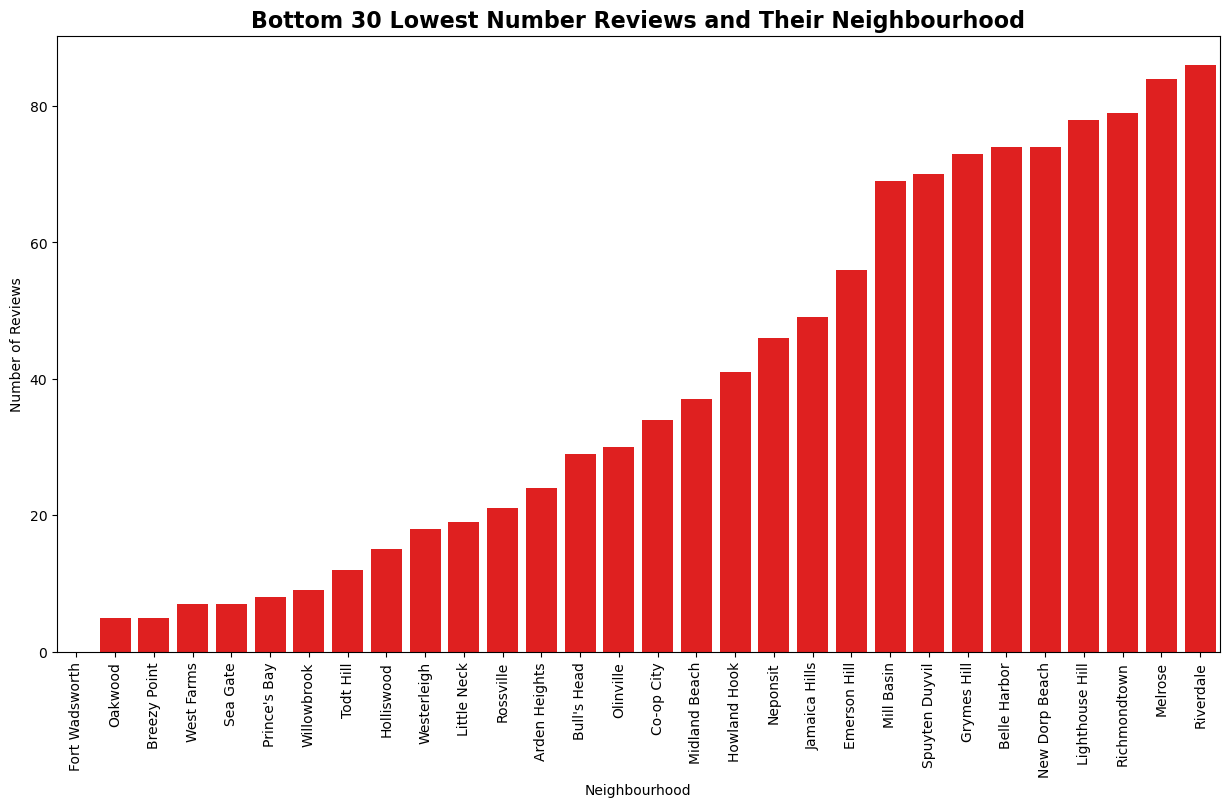

In [52]:
plt.figure(figsize=(15,8))
sns.barplot(x=neigh_review['neighbourhood'],y=neigh_review['number_of_reviews'],color='r')
plt.title("Bottom 30 Lowest Number Reviews and Their Neighbourhood",fontweight='bold',size=16)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

# Multivaraite Analysis

Relationship and Distribution of Variables

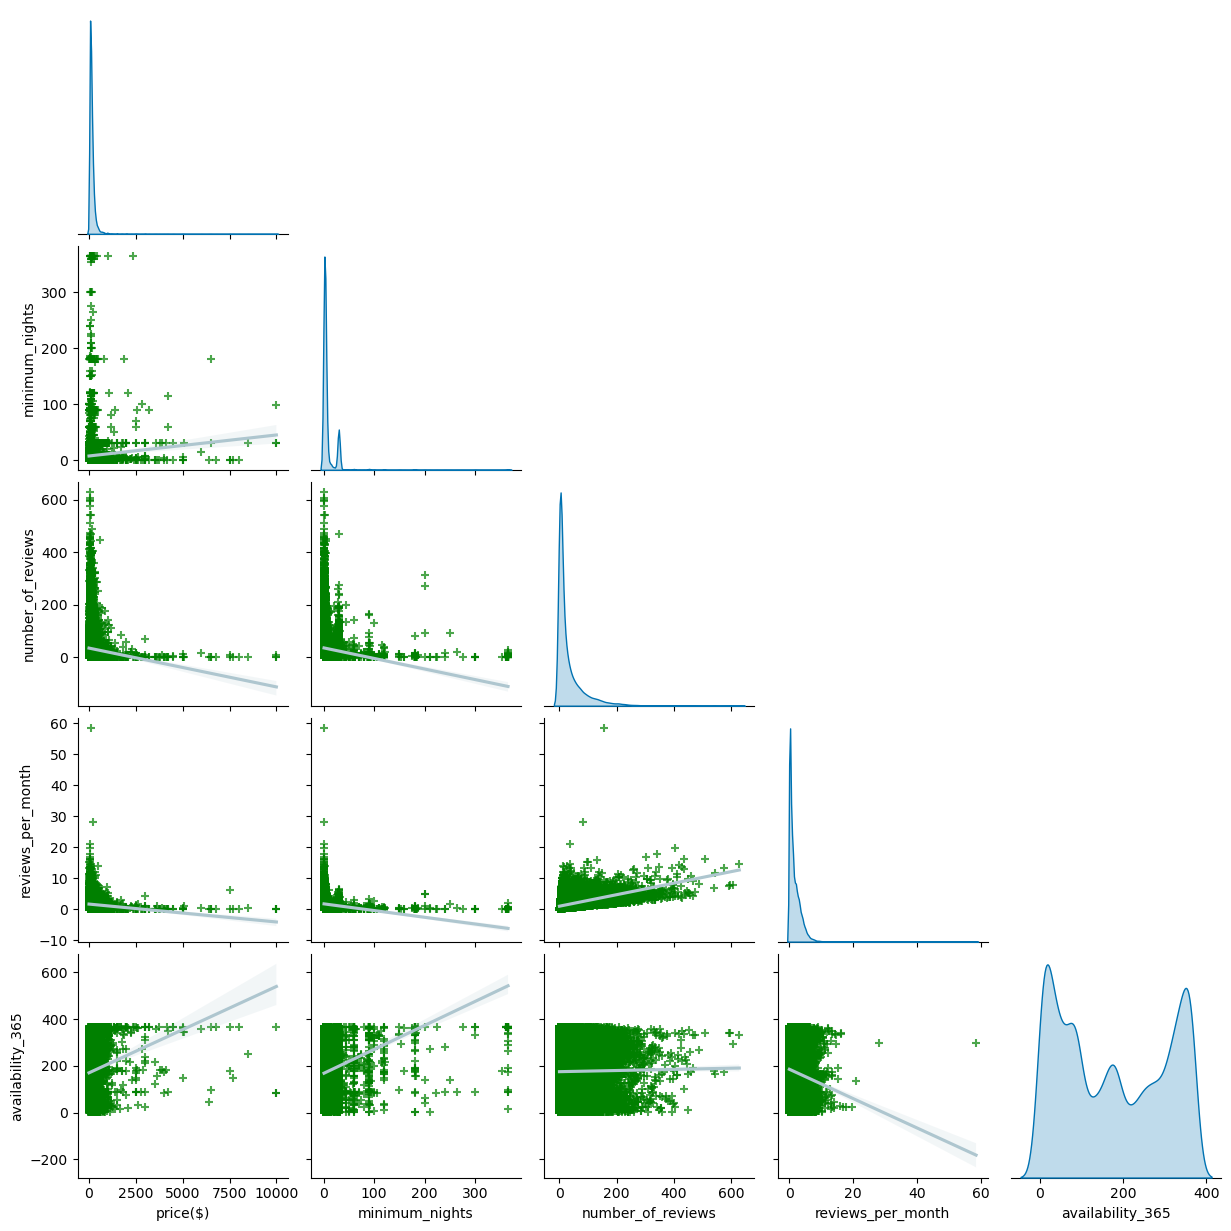

In [76]:
sns.pairplot(df,markers='+',diag_kind="kde",kind="reg",
            plot_kws={'line_kws':{'color':'#aec6cf'},'scatter_kws':
                      {'alpha':0.7,'color':'g'}},corner=True)
plt.show()

Correlation  Between Varaibles

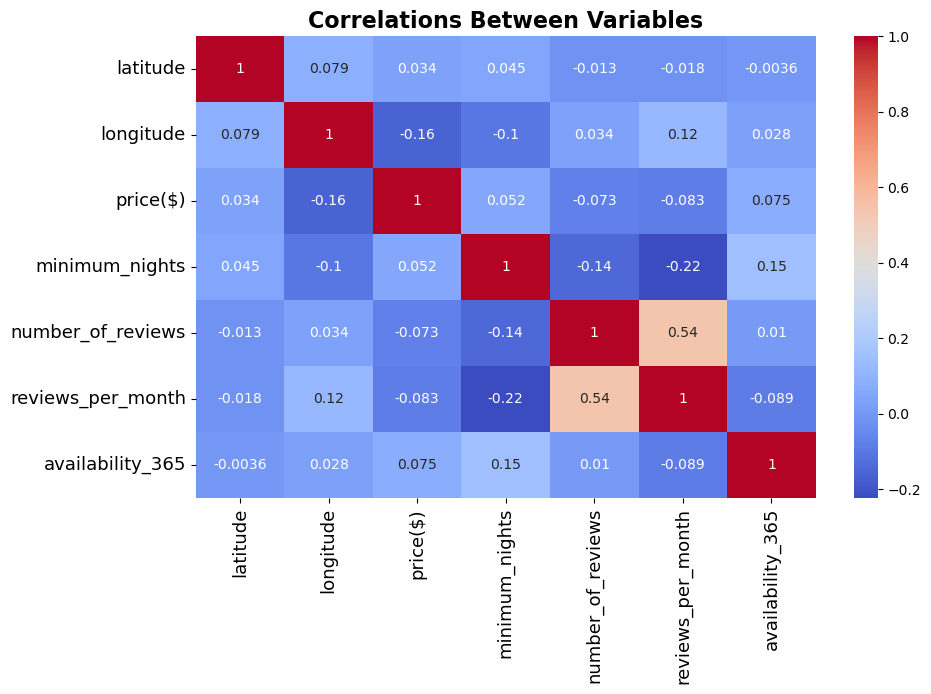

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlations Between Variables',size=16,fontweight='bold')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

Interpretation

Airbnb average prices for any kind of room type is highest in Manhattan, followed by Brooklyn. 
The average price of Entire home/apt is highest with dollars 268.25, followed by private room
with dollars 127.97 and shared room with dollars 84.44. These average prices are with respect to Manhattan district.

# SUMMARY

* The majority of listings in NYC are of the entire home/apartment type, followed by private rooms and shared rooms.
* Manhattan has the highest share of listings followed by Brooklyn, Queens, Bronx and Staten Island.
* Prices vary across different regions, with certain regions having higher average prices compared to others.
* Average availability in days varies across neighborhoods,with further analysis we can understand the demand and supply dynamics in various neighborhoods.
* There is no strong correlation between price of listings and number of reviews.
* Further analysis is required to analyze the outliers in both price and number of reviews columns.